In [ ]:
%pip install pandas
import pandas as pd

data = pd.read_csv('BAlanced_AHR.csv')

data.head()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,IMPOSIBLE DESCANSAR,2,El fin de semana mi pareja y yo hicimos una re...,Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,0
1,1,No es oro todo lo que reluce,3,"El hotel en general está bien, las habtiacione...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
2,2,Un buen hotel con mucho ruido.,3,"El hotel es moderno, amplio y limpio, pero no ...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
3,3,SIN CALEFACCIÓN OPERATIVA Y CON FRÍO,2,Calefacción averiada o no operativa. Se coment...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0
4,4,Deja bastante que desear.,2,Este hotel ha bajado notoriamente su categoria...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0


# Изучение

In [17]:
null_values = data.isnull().sum()
print("Null в столбцах:\n", null_values)

data_types = data.dtypes
print("\nТип данных в столбцах:\n", data_types)

data_description = data.describe(include='all')
print("\nНебольшая статистика по столбцам:\n", data_description)

Null в столбцах:
 Unnamed: 0       0
title            0
rating           0
review_text      0
location       796
hotel          796
label            0
dtype: int64

Тип данных в столбцах:
 Unnamed: 0      int64
title          object
rating          int64
review_text    object
location       object
hotel          object
label           int64
dtype: object

Небольшая статистика по столбцам:
          Unnamed: 0      title       rating  \
count   7615.000000       7615  7615.000000   
unique          NaN       4325          NaN   
top             NaN  Excelente          NaN   
freq            NaN         78          NaN   
mean    3807.000000        NaN     3.130269   
std     2198.405483        NaN     1.548310   
min        0.000000        NaN     1.000000   
25%     1903.500000        NaN     2.000000   
50%     3807.000000        NaN     3.000000   
75%     5710.500000        NaN     5.000000   
max     7614.000000        NaN     5.000000   

                                          

# Отловим пропуски

In [ ]:
data_cleaned = data.dropna()
data_cleaned.head()

null_values_cleaned = data_cleaned.isnull().sum()
print("Null values in each column after cleaning:\n", null_values_cleaned)

Null values in each column after cleaning:
 Unnamed: 0     0
title          0
rating         0
review_text    0
location       0
hotel          0
label          0
dtype: int64


# Категоризация

In [ ]:
# категории
uniq = data_cleaned['location'].unique()
print(uniq)

['Seville_Province_of_Seville_Andalucia'
 'Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia'
 'Malaga_Costa_del_Sol_Province_of_Malaga'
 'Malaga_Costa_del_Sol_Province_of_Malag'
 'Malaga_Costa_del_Sol_Province_of_Malaga_Andaluci'
 'Granada_Province_of_Granada_Andalucia'
 'Cordoba_Province_of_Cordoba_Andalucia'
 'Almeria_Province_of_Almeria_Andalucia'
 'Cabo_de_Gata_Almeria_Province_of_Almeria_Andalucia'
 'Jaen_Province_of_Jaen_Andalucia'
 'Torredonjimeno_Province_of_Jaen_Andalucia'
 'znajar_Province_of_Cordoba_Andalucia'
 'Torre_del_Campo_Province_of_Jaen_Andalucia'
 'Huelva_Province_of_Huelva_Andalucia'
 'Palos_de_la_Frontera_Province_of_Huelva_Andalucia'
 'Aljaraque_Province_of_Huelva_Andalucia'
 'Punta_Umbria_Province_of_Huelva_Andalucia'
 'Moguer_Province_of_Huelva_Andalucia'
 'an_Juan_del_Puerto_Province_of_Huelva_Andalucia'
 'Alajar_Sierra_de_Aracena_and_Picos_de_Aroche_Natural_Park_Province_of'
 'Tavira_Faro_District_Algarve']


In [29]:
data_coded = data_cleaned
# Кодирование категориальных признаков
data_coded['location'], uniques = pd.factorize(data_coded['location'])

# Вывод первых нескольких строк закодированного датасета
data_coded.head(20)



,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,IMPOSIBLE DESCANSAR,2,El fin de semana mi pareja y yo hicimos una re...,0,Hotel_Rey_Alfonso_X,0
1,1,No es oro todo lo que reluce,3,"El hotel en general está bien, las habtiacione...",0,Hotel_Rey_Alfonso_X,3
2,2,Un buen hotel con mucho ruido.,3,"El hotel es moderno, amplio y limpio, pero no ...",0,Hotel_Rey_Alfonso_X,3
3,3,SIN CALEFACCIÓN OPERATIVA Y CON FRÍO,2,Calefacción averiada o no operativa. Se coment...,0,Melia_Sevilla,0
4,4,Deja bastante que desear.,2,Este hotel ha bajado notoriamente su categoria...,0,Melia_Sevilla,0
5,5,Desastre de ascensores,2,"Son pequeños, se bloquean y son insuficientes ...",0,Melia_Sevilla,0
6,6,Mal mal y mal,2,Mal mal y mal. Una enorme diferencia de trato ...,0,Melia_Sevilla,0
7,7,Suciedad intolerable,1,Jamás me he encontrado un nivel de suciedad co...,0,Melia_Sevilla,0
8,8,Lamentable,1,Lamentable elegir un hotel de cuatro estrellas...,0,Melia_Sevilla,0
9,9,Sigo aquí pero quiero cambiarme de hotel,2,El hotel fantástico. Los desayunos muy buenos...,0,Hotel_Sevilla_Center,0


In [ ]:

print("Уникальные значения и их коды:\n", dict(enumerate(uniques)))

Уникальные значения и их коды:
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20}


In [30]:
uniq = data_cleaned['location'].unique()
print(uniq)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


# Масштабирование данных

In [40]:
%pip install scikit-learn matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.8 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


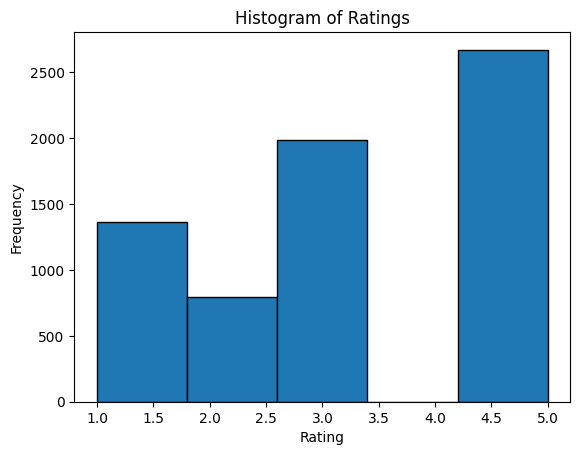

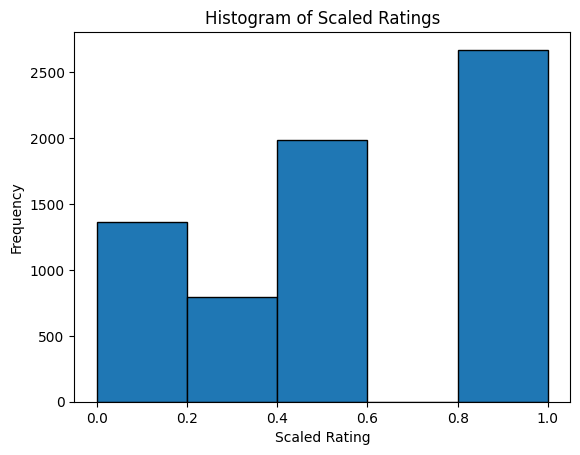

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib.pyplot as plt
data_scale = data_cleaned
sc1 = MinMaxScaler()
# Применение MinMaxScaler к столбцу 'rating'
sc1_data = sc1.fit_transform(data_scale[['rating']])

# Построение гистограммы для столбца 'rating'
plt.hist(data_scale['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

# Построение гистограммы для масштабированных данных
plt.hist(sc1_data, bins=5, edgecolor='black')
plt.xlabel('Scaled Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Ratings')
plt.show()

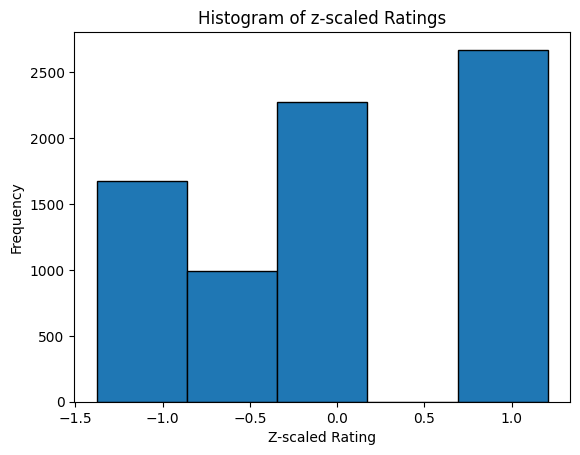

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
sc2 = StandardScaler()

data = pd.read_csv('BAlanced_AHR.csv')
sc2_data = sc2.fit_transform(data[['rating']])
plt.hist(sc2_data, bins=5, edgecolor='black')
plt.xlabel('Z-scaled Rating')
plt.ylabel('Frequency')
plt.title('Histogram of z-scaled Ratings')
plt.show()